# Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis (EDA) process for the dataset. All explanations of EDA have been removed for clarity and simplicity, and the content is now presented in English.

# Lab 5 : Exploratory Data Analysis

## Use Huggingface to download the dataset 🤗.

In [1]:
!hf download celesca/election_results_2569 --repo-type dataset --local-dir ./

Fetching 4 files: 100%|███████████████████████████| 4/4 [00:02<00:00,  1.72it/s]
Download complete: 100%|██████████████████████| 818k/818k [00:02<00:00, 352kB/s]/Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda
Download complete: 100%|██████████████████████| 818k/818k [00:02<00:00, 350kB/s]


In [2]:
!unzip -q ./data.zip

checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ��� 1/.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ��� 1/constituency_candidates.csv.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ���

In [3]:
import shutil
from pathlib import Path

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

data_folders = ["all_constituency", "area", "party", "partylist", "referendum", "seat", "winner"]

for folder in data_folders:
    folder_path = Path(folder)
    if folder_path.exists():
        for csv_file in folder_path.glob("*.csv"):
            shutil.copy(csv_file, data_dir / csv_file.name)
            print(f"Copied {csv_file.name} to data/")


Copied areas.csv to data/
Copied partyStandings.csv to data/
Copied party_list_top2.csv to data/
Copied map.csv to data/
Copied seat500.csv to data/
Copied winner.csv to data/


In [4]:
for folder in data_folders:
    folder_path = Path(folder)
    if folder_path.exists():
        shutil.rmtree(folder_path)
        print(f"Removed {folder} directory")

if Path("data.zip").exists():
    Path("data.zip").unlink()
    print("Removed data.zip")

print("\nCSV files are now in the 'data/' directory")


Removed all_constituency directory
Removed area directory
Removed party directory
Removed partylist directory
Removed referendum directory
Removed seat directory
Removed winner directory
Removed data.zip

CSV files are now in the 'data/' directory


## Thai Font in Matplotlib

Download Thai font and place it in your working directory.

In [5]:
font_path = "THSarabunNew.ttf"

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

font_path = "THSarabunNew.ttf"
font_manager.fontManager.addfont(font_path)
rcParams["font.family"] = "TH Sarabun New"
thai_font = font_manager.FontProperties(fname=font_path)

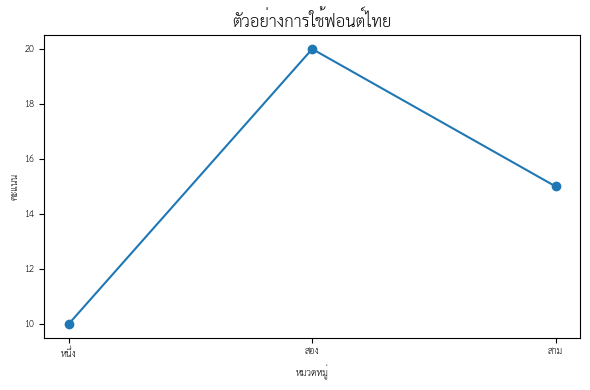

In [7]:
plt.figure(figsize=(6, 4))
plt.title("ตัวอย่างการใช้ฟอนต์ไทย", fontproperties=thai_font, fontsize=18)
plt.xlabel("หมวดหมู่", fontproperties=thai_font)
plt.ylabel("คะแนน", fontproperties=thai_font)

plt.plot([1, 2, 3], [10, 20, 15], marker="o")
plt.xticks([1, 2, 3], ["หนึ่ง", "สอง", "สาม"], fontproperties=thai_font)
plt.yticks(fontproperties=thai_font)

plt.tight_layout()
plt.show()

# Context

## 2026 Thai General Election

The 2026 Thai general election was held on 8 February 2026 to choose members of Thailand’s House of Representatives. The election was triggered after the House of Representatives was dissolved on 12 December 2025. All 500 seats in the House were up for election.

The electoral system used two methods:
- 400 seats elected from constituencies.
- 100 seats allocated by party-list proportional representation.

The election was held alongside a referendum to decide whether to begin drafting a new constitution to replace the current 2017 charter.

# EDA

## Data understanding

- `winner`: constituency election results. Each row is one constituency winner, with party and vote summary fields.
- `party_standings`: overall party standings. Each row is one party with total votes and seat counts.
- `seat500`: 500-seat allocation table. Each row is one seat record linked to a party code.
- `party_list_top2`: top-2 party-list result per constituency. Each row is one constituency with the top two parties and vote shares.
- `map_data`: map-ready referendum and geography fields. Each row is one constituency area used for mapping.

### Unit of analysis

- `winner`: constituency-level.
- `party_standings`: party-level.
- `seat500`: seat-level.
- `party_list_top2`: constituency-level.
- `map_data`: constituency-level (and can be grouped to province-level by `provinceName`).

### Key IDs and join keys

- `id`: primary row identifier in each table, but meaning changes by table (party ID in `party_standings`, constituency ID in `winner`, `party_list_top2`, and `map_data`).
- `partyCode`: party key in `seat500`.
- `provinceName`: geographic key for province-level grouping and joins.
- Party joins: use `party_standings.id` ↔ `seat500.partyCode`; in `winner`, the winner party code is stored in `partyWinner`.